In [1]:
import pandas as pd
import os
import glob
from dbfread import DBF
from matplotlib import pyplot as plt
import seaborn as sb
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

#### 종속변수 확인

In [2]:
y_data = pd.read_csv("./데이터/침수지역2022.csv")
y =y_data['ADM_NM']


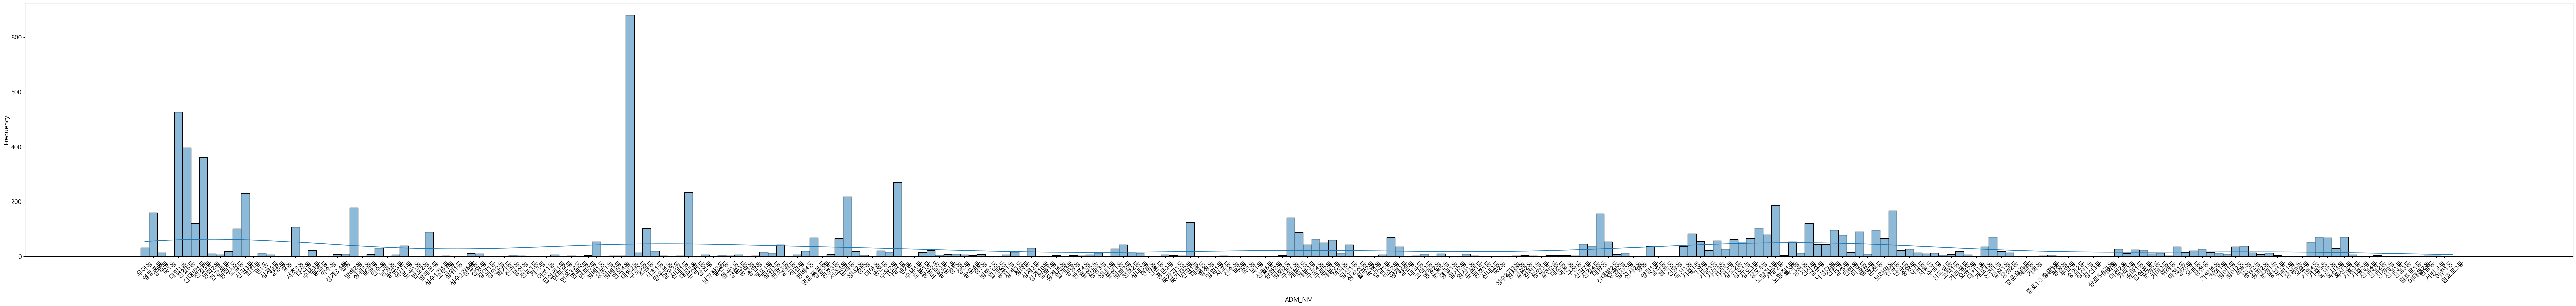

In [3]:
plt.figure(figsize= (100, 10))
sb.histplot(data = y_data, x = y, kde = True)
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()
plt.close()

In [4]:
frequency = y.value_counts()

# 빈도수가 가장 높은 상위 10개 요소 추출
top_10 = frequency.head(20)

print(top_10)


ADM_NM
대림2동     880
대림1동     527
신길6동     397
신길5동     362
사당1동     270
대림3동     233
신길3동     230
문래동      218
사당2동     187
방배2동     178
신림동      167
영등포동     160
대방동      156
구로5동     141
신길1동     124
신사동      121
신대방1동    120
서초3동     107
상도4동     104
조원동      103
Name: count, dtype: int64


In [5]:
len(set(y))

277

#### 독립변수

In [7]:
green_infra = pd.read_csv("./데이터/제방암거수문개수.csv",encoding='euc-kr')
green_infra.head()

,GU_NAME,ADM_NM,제방,수문,암거
0,강남구,개포1동,65,4,58
1,강남구,개포2동,30,11,95
2,강남구,개포4동,47,3,48
3,강남구,논현1동,0,0,64
4,강남구,논현2동,0,0,93


하천까지의 거리 데이터

In [17]:
dist = pd.read_csv("./데이터/하천까지의_거리.csv")
dist_data = dist[['GU_NAME','ADM_NM','HubDist']]
dist_data

,GU_NAME,ADM_NM,HubDist
0,종로구,사직동,961.440982
1,종로구,삼청동,481.426072
2,종로구,부암동,719.095967
3,종로구,평창동,70.039725
4,종로구,무악동,1381.962564
...,...,...,...
419,강동구,둔촌1동,1112.581499
420,강동구,둔촌2동,286.658161
421,강동구,암사1동,1421.991249
422,강동구,천호2동,713.146580


배수등급양호비율 데이터

In [9]:
drain = pd.read_csv("./데이터/배수등급양호비율.csv")
drain

,GU_NAME,ADM_NM,양호개수,배수전체개수,양호비율
0,송파구,가락1동,157,240,0.654167
1,송파구,가락2동,96,114,0.842105
2,송파구,가락본동,85,125,0.680000
3,구로구,가리봉동,75,109,0.688073
4,금천구,가산동,274,449,0.610245
...,...,...,...,...,...
412,용산구,효창동,102,104,0.980769
413,용산구,후암동,178,178,1.000000
414,동대문구,휘경1동,28,69,0.405797
415,동대문구,휘경2동,52,173,0.300578


고도

In [10]:
elevation = pd.read_csv("./데이터/동별_인구_고도_배수등급_공시지가_결합.csv")
elevation_data = elevation[['ADM_NM','ELEVATION']]
avg_elevation = elevation_data.groupby('ADM_NM').mean()
avg_elevation

,ELEVATION
ADM_NM,
가락1동,14.073375
가락2동,39.052807
가락본동,27.424560
가리봉동,19.188716
가산동,11.561938
...,...
효창동,40.470865
후암동,95.375112
휘경1동,16.780435


경사도(%)

In [48]:
slope = pd.read_excel("./데이터/경사도.xlsx")
slope.head()

,AREA,PERIMETER,CODE_SL,SOILSLOPE,열2,OBJECTID_1,OBJECTID,BASE_YEAR,ADM_CD,ADM_NM,Shape_Area,GU_CODE,GU_NAME,POP,경사도
0,680851000,14116100.0,999,기타,NaN,10,10,2016,1101064,이화동,7.818062e+05,11110,종로구,8582,0.0
1,680851000,14116100.0,999,기타,NaN,15,15,2016,1101071,숭인2동,3.516402e+05,11110,종로구,10041,0.0
2,680851000,14116100.0,999,기타,NaN,17,17,2016,1101073,혜화동,1.131570e+06,11110,종로구,20465,0.0
3,680851000,14116100.0,999,기타,NaN,23,23,2016,1102059,광희동,7.403358e+05,11140,중구,6247,0.0
4,680851000,14116100.0,999,기타,NaN,24,24,2016,1102060,을지로동,6.076142e+05,11140,중구,1998,0.0


In [51]:
data = {
    "ADM_NM": slope['ADM_NM'],
    "경사도": slope['경사도']*100
}

slope_data = pd.DataFrame(data)
mean_slope= slope_data.groupby("ADM_NM")["경사도"].mean()
mean_slope

ADM_NM
가락1동     3.812500
가락2동     7.125000
가락본동    10.785714
가리봉동     9.666667
가산동      8.772727
          ...    
효창동     12.666667
후암동     39.625000
휘경1동     5.800000
휘경2동     5.583333
흑석동     12.769231
Name: 경사도, Length: 423, dtype: float64

공시지가